In [1]:
import pandas as pd
import numpy as np
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
matplotlib.rcParams['pdf.fonttype'] =42
import matplotlib.ticker as ticker
import matplotlib.patches as mpatches
import re
import seaborn as sns

In [4]:
df_groups = pd.read_csv("df_groups.csv")
del df_groups['Unnamed: 0']
df_groups.head()

,Number,ratings2,ratings1,counts2,counts1,dev2,dev1,Text,length,word_leng,group
0,1,NaN,0.901997,0,32024.0,NaN,5.242998,"A man visits the doctor. The doctor says, I ha...",30,short,9
1,2,NaN,0.162989,0,35277.0,NaN,5.627972,This couple had an excellent relationship goin...,69,medium,7
2,3,NaN,0.193411,0,32402.0,NaN,5.448998,Q. Whats 200 feet long and has 4 teeth?A. The ...,17,short,3
3,4,NaN,-1.412599,0,30512.0,NaN,5.276202,Q. Whats the difference between a man and a to...,21,short,3
4,5,-2.034618,0.235352,566,73405.0,5.423289,5.302902,"Q. Whats O. J. Simpsons web address?A. Slash, ...",13,very short,3


In [5]:
df_sentim = pd.read_csv("sentiments.csv")
del df_sentim['Unnamed: 0']
df_sentim.head()

,Number,ratings2,ratings1,counts2,counts1,dev2,dev1,Text,length,word_leng,anger,joy,positivity,negativity,surprise,fear,anticipation
0,1,NaN,0.901997,0,32024.0,NaN,5.242998,"A man visits the doctor. The doctor says, I ha...",30,short,0.400000,0.100000,0.300000,0.400000,0.0,0.500000,0.100000
1,2,NaN,0.162989,0,35277.0,NaN,5.627972,This couple had an excellent relationship goin...,69,medium,0.066667,0.066667,0.133333,0.066667,0.0,0.066667,0.000000
2,3,NaN,0.193411,0,32402.0,NaN,5.448998,Q. Whats 200 feet long and has 4 teeth?A. The ...,17,short,0.166667,0.000000,0.000000,0.166667,0.0,0.000000,0.166667
3,4,NaN,-1.412599,0,30512.0,NaN,5.276202,Q. Whats the difference between a man and a to...,21,short,0.000000,0.000000,0.000000,0.400000,0.0,0.000000,0.000000
4,5,-2.034618,0.235352,566,73405.0,5.423289,5.302902,"Q. Whats O. J. Simpsons web address?A. Slash, ...",13,very short,0.571429,0.000000,0.142857,0.142857,0.0,0.142857,0.142857


In [7]:
df = df_groups.merge(df_sentim, left_on='Number', right_on='Number', how='left')
pd.set_option("display.max_columns", 100)
df

,Number,ratings2_x,ratings1_x,counts2_x,counts1_x,dev2_x,dev1_x,Text_x,length_x,word_leng_x,group,ratings2_y,ratings1_y,counts2_y,counts1_y,dev2_y,dev1_y,Text_y,length_y,word_leng_y,anger,joy,positivity,negativity,surprise,fear,anticipation
0,1,NaN,0.901997,0,32024.0,NaN,5.242998,"A man visits the doctor. The doctor says, I ha...",30,short,9,NaN,0.901997,0,32024.0,NaN,5.242998,"A man visits the doctor. The doctor says, I ha...",30,short,0.400000,0.100000,0.300000,0.400000,0.000000,0.500000,0.100000
1,2,NaN,0.162989,0,35277.0,NaN,5.627972,This couple had an excellent relationship goin...,69,medium,7,NaN,0.162989,0,35277.0,NaN,5.627972,This couple had an excellent relationship goin...,69,medium,0.066667,0.066667,0.133333,0.066667,0.000000,0.066667,0.000000
2,3,NaN,0.193411,0,32402.0,NaN,5.448998,Q. Whats 200 feet long and has 4 teeth?A. The ...,17,short,3,NaN,0.193411,0,32402.0,NaN,5.448998,Q. Whats 200 feet long and has 4 teeth?A. The ...,17,short,0.166667,0.000000,0.000000,0.166667,0.000000,0.000000,0.166667
3,4,NaN,-1.412599,0,30512.0,NaN,5.276202,Q. Whats the difference between a man and a to...,21,short,3,NaN,-1.412599,0,30512.0,NaN,5.276202,Q. Whats the difference between a man and a to...,21,short,0.000000,0.000000,0.000000,0.400000,0.000000,0.000000,0.000000
4,5,-2.034618,0.235352,566,73405.0,5.423289,5.302902,"Q. Whats O. J. Simpsons web address?A. Slash, ...",13,very short,3,-2.034618,0.235352,566,73405.0,5.423289,5.302902,"Q. Whats O. J. Simpsons web address?A. Slash, ...",13,very short,0.571429,0.000000,0.142857,0.142857,0.000000,0.142857,0.142857
5,6,NaN,1.330277,0,39599.0,NaN,4.976994,Bill and Hillary Clinton are on a trip back to...,121,long,2,NaN,1.330277,0,39599.0,NaN,4.976994,Bill and Hillary Clinton are on a trip back to...,121,long,0.000000,0.033333,0.133333,0.033333,0.033333,0.000000,0.033333
6,7,-1.952510,-0.633947,50692,73401.0,5.370893,5.610902,How many feminists does it take to screw in a ...,14,very short,4,-1.952510,-0.633947,50692,73401.0,5.370893,5.610902,How many feminists does it take to screw in a ...,14,very short,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
7,8,-0.716500,-0.996267,50692,73411.0,5.153371,4.968263,Q. Did you hear about the dyslexic devil worsh...,15,short,7,-0.716500,-0.996267,50692,73411.0,5.153371,4.968263,Q. Did you hear about the dyslexic devil worsh...,15,short,0.500000,0.000000,0.000000,0.500000,0.000000,0.500000,0.500000
8,9,NaN,-0.620039,0,30741.0,NaN,5.201667,A country guy goes into a city bar that has a ...,91,long,7,NaN,-0.620039,0,30741.0,NaN,5.201667,A country guy goes into a city bar that has a ...,91,long,0.000000,0.080000,0.120000,0.080000,0.000000,0.040000,0.120000
9,10,NaN,1.181706,0,39352.0,NaN,5.183989,Two cannibals are eating a clown. One turns to...,19,short,2,NaN,1.181706,0,39352.0,NaN,5.183989,Two cannibals are eating a clown. One turns to...,19,short,0.000000,0.333333,0.333333,0.000000,0.333333,0.000000,0.333333


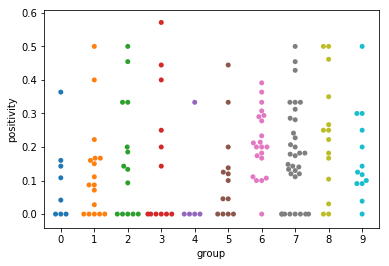

In [27]:
sns.swarmplot(x="group", y="positivity", data=df, size=5)

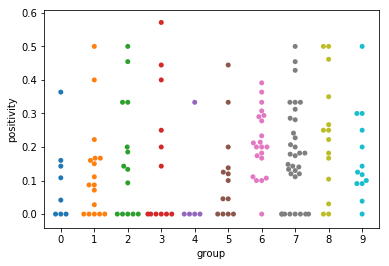

In [29]:
sns_plot = sns.swarmplot(x="group", y="positivity", data=df, size=5)
fig = sns_plot.get_figure()
fig.savefig("output.pdf")

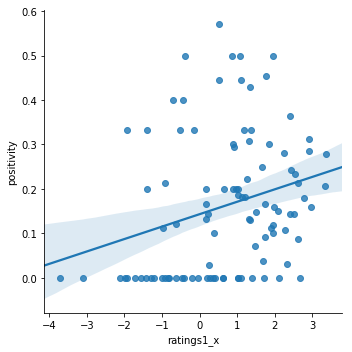

In [50]:
sns.lmplot(x="ratings1_x", y="positivity", data=df)

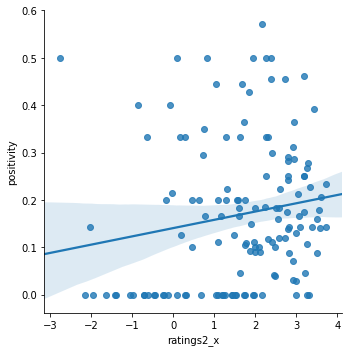

In [31]:
sns.lmplot(x="ratings2_x", y="positivity", data=df)

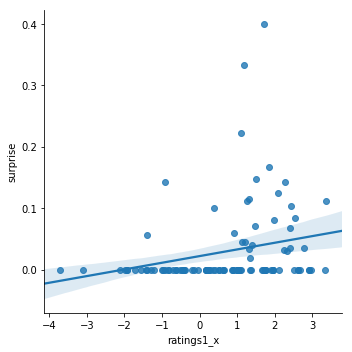

In [42]:
sns.lmplot(x="ratings1_x", y="surprise", data=df)

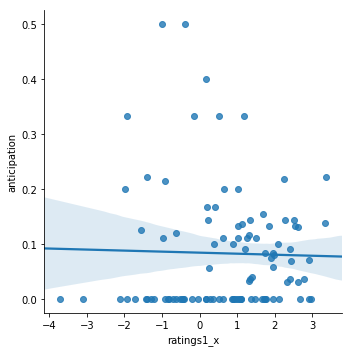

In [43]:
sns.lmplot(x="ratings1_x", y="anticipation", data=df)

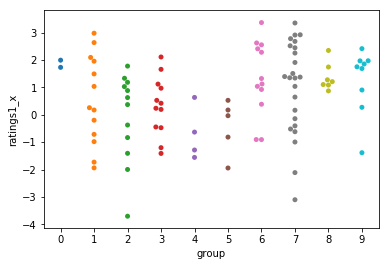

In [45]:
sns_plot = sns.swarmplot(x="group", y="ratings1_x", data=df, size=5)

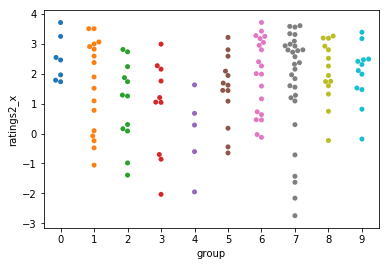

In [46]:
sns_plot = sns.swarmplot(x="group", y="ratings2_x", data=df, size=5)